# 机器学习100天——第6天：逻辑回归（Linear Regression）
1. 综述
<br>逻辑回归是应用非常广泛的一个分类机器学习算法，它将数据拟合到一个logit函数(或者叫做logistic函数)中，从而能够完成对事件发生的概率进行预测。
2. 由来
<br>线性回归能对连续值结果进行预测，而现实生活中常见的另外一类问题是，分类问题。最简单的情况是是与否的二分类问题。
<br>比如说医生需要判断病人是否生病，银行要判断一个人的信用程度是否达到可以给他发信用卡的程度，邮件收件箱要自动对邮件分类为正常邮件和垃圾邮件等等。
<br>其的核心思想是，如果线性回归的结果输出是一个连续值，而值的范围是无法限定的，那我们有没有办法把这个结果值映射为可以帮助我们判断的结果呢。即需要输出结果为(0,1) 一个概率值，sigmoid函数就上场了。
3. 判定边界
<br>可以理解为是用以对不同类别的数据分割的边界，边界的两旁应该是不同类别的数据。
4. 代价函数与梯度下降
<br>所谓的代价函数Cost Function，其实是一种衡量我们在这组参数下预估的结果和实际结果差距的函数

## 第1步：数据预处理
### 导入库

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

### 导入数据集
<a href = "https://github.com/Avik-Jain/100-Days-Of-ML-Code/blob/master/datasets/Social_Network_Ads.csv">这里</a>获取数据集

In [2]:
dataset = pd.read_csv('../datasets/Social_Network_Ads.csv')
print(dataset.tail())
X = dataset.iloc[:, [2, 3]].values
Y = dataset.iloc[:,4].values

      User ID  Gender  Age  EstimatedSalary  Purchased
395  15691863  Female   46            41000          1
396  15706071    Male   51            23000          1
397  15654296  Female   50            20000          1
398  15755018    Male   36            33000          0
399  15594041  Female   49            36000          1


### 将数据集分成训练集和测试集

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

### 特征缩放(Feature Scaling)
进行缩放后，多维特征将具有相近的尺度，这将帮助梯度下降算法更快地收敛。

In [4]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

/Users/har/py/virtualenv/data_analysis/lib/python3.7/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


## 第二步：逻辑回归模型
该项工作的库将会是一个线性模型库，之所以被称为线性是因为逻辑回归是一个线性分类器，这意味着我们在二维空间中，我们两类用户（购买和不购买）将被一条直线分割。然后导入逻辑回归类。下一步我们将创建该类的对象，它将作为我们训练集的分类器。
### 将逻辑回归应用于训练集

In [5]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

## 第3步：预测
### 预测测试集结果

In [6]:
y_pred = classifier.predict(X_test)

## 第4步：评估预测
我们预测了测试集。 现在我们将评估逻辑回归模型是否正确的学习和理解。因此这个混淆矩阵将包含我们模型的正确和错误的预测。
### 生成混淆矩阵

In [7]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

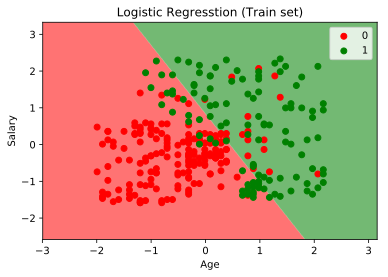

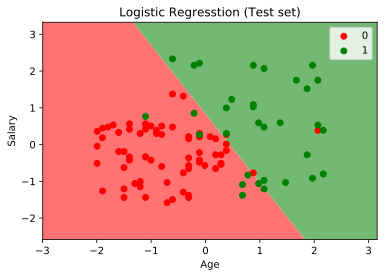

In [8]:
# plot data set and boundary
from matplotlib.colors import ListedColormap

theta = classifier.coef_
b = classifier.intercept_
# line equation: age * theta_0 + salary * theta1 + b = 0
age_plot = [i/10 for i in range(-40, 40)]
salary_plot = -1 * (theta[0, 0] * np.array(age_plot) + b)/theta[0, 1]


def plot_result(x, y, type='train'):
    xlim = [-3, 3]
    ylim = [-2.5, 3.5]
    x_positive = x[np.where(y == 1)]
    x_negative = x[np.where(y == 0)]
    fig_train = plt.figure()
    ax = fig_train.add_subplot(111)
    plt.xlabel('Age')
    plt.ylabel('Salary')
    plt.title('Logistic Regresstion (%s set)' % type)

    X_set, y_set = X_test, y_test
    X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
                        np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01))
    plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
                alpha=0.55, cmap=ListedColormap(('red', 'green')))

    # ax.plot(age_plot, salary_plot, c='r')
    # plt.fill_between(age_plot, salary_plot, ylim[-1], color='lawngreen')
    # plt.fill_between(age_plot, ylim[0], salary_plot, color='hotpink')
    ax.scatter(x_negative[:, 0], x_negative[:, 1], c='r', label='0')
    ax.scatter(x_positive[:, 0], x_positive[:, 1], c='g', label='1')
    ax.set_xlim((X1.min(), X1.max()))
    ax.set_ylim((X2.min(), X2.max()))
    plt.legend()

plot_result(X_train, y_train, type="Train")
plot_result(X_test, y_test, type="Test")